# Activity 4

In [31]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
from simple_colors import *
import pandas as pd
from numpy import asarray
import time

In [32]:
def query(face, database):
    # creating a database
    matrixdata1 = []
    images = os.listdir(database)
    for i in images:
        x = Image.open(os.path.join(database,i))
        predata = np.asarray(x)
        shape = predata.shape
        data1 = predata.ravel()
        reshapedata = data1.T
        matrixdata1.append(reshapedata)
    matrixdata2 = np.array(matrixdata1).T
    #print('matrix of m x n images:'  ,matrixdata2)  # we can check the values of matrix if we need
    #print('Dimension of m x n matrix'  ,matrixdata2.shape) # we can check the dimension of the matrix
    
    
    # creating a face
    matrixface1 = []
    image = Image.open(face) 
    preface = np.asarray(image)
    face1 = preface.ravel()
    reshapeface = face1.T
    matrixface1.append(reshapeface)
    matrixface2 = np.array(matrixface1).T
    #print('matrix of m x 1 image:', matrixface2) # we can check the values of matrix if we need
    #print('Dimension of m x 1 matrix', matrixface2.shape) # we can check the dimension of the matrix
    
    
  
    # creating a norm of the difference between known and unknown image
    
    st = time.process_time() # for time calculation

    error = []
    for j in range(0,matrixdata2.shape[1]):
        a = np.linalg.norm(matrixface2[:,0] - matrixdata2[:,j])
        error.append(a)
        
    et = time.process_time() 
    res = et - st
    print(red('CPU Execution time:',['bold']), res, 'seconds') # for time calculation

    #print(magenta('The class of norm error is',['reverse']),type(error))
    
    #print(blue('norm of the difference between vectors of images is given below',['reverse']))
    
    #print(error)
    
    #print(yellow('The number of images in our known database is:',['reverse'] ),len(error))
    
    #print(red('The closest match is subject:',['reverse']), images[error.index(min(error))], error.index(min(error))+1)
    
    #plotting the unknown image and the closest match
    
    print()
    print(green('The closest match to the query',['bold', 'reverse']), face, 
         green('is', ['bold','reverse']), images[error.index(min(error))])
    print()
    print(green('and its image number in the database is',['bold','reverse']), error.index(min(error))+1)
    
    imgdata = np.asarray(matrixdata2[:,error.index(min(error))]).reshape(243,320)
    image = Image.fromarray(imgdata)   
      
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))
    fig.tight_layout() 
    plt.subplot(1,2,2)
    plt.imshow(image,cmap='Greys_r')
    plt.title('Closest match')
    plt.axis('off')
    plt.subplot(1,2,1)
    img = Image.open(face)
    plt.imshow(img,cmap='Greys_r')
    plt.title('Unknown subject')
    plt.axis('off')
    #plt.savefig('q4.png')
    plt.show()
    
    

CPU Execution time: 0.015625 seconds

The closest match to the query unknown/subject01.noglasses.gif is subject01.centerlight.gif

and its image number in the database is 1


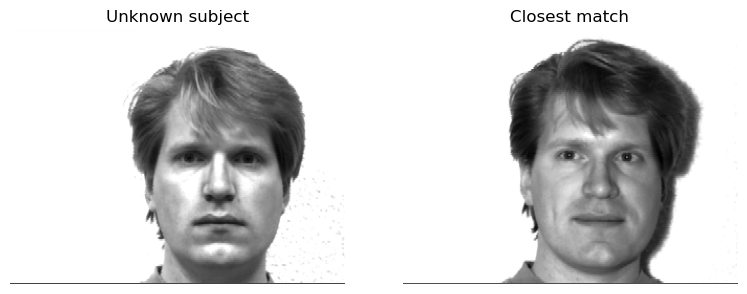

In [33]:
query('unknown/subject01.noglasses.gif', 'known')

CPU Execution time: 0.0 seconds

The closest match to the query unknown/subject04.noglasses.gif is subject04.surprised.gif

and its image number in the database is 23


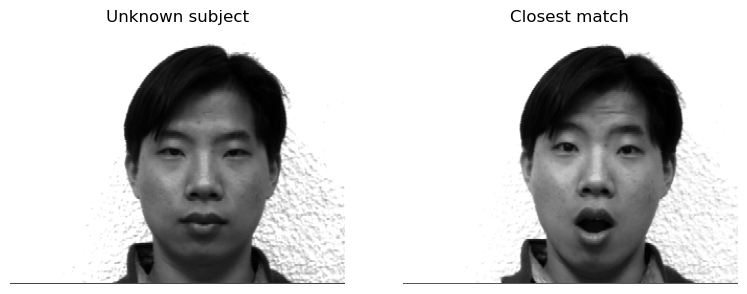

In [34]:

query('unknown/subject04.noglasses.gif', 'known')

CPU Execution time: 0.015625 seconds

The closest match to the query unknown/subject05.happy.gif is subject05.wink.gif

and its image number in the database is 30


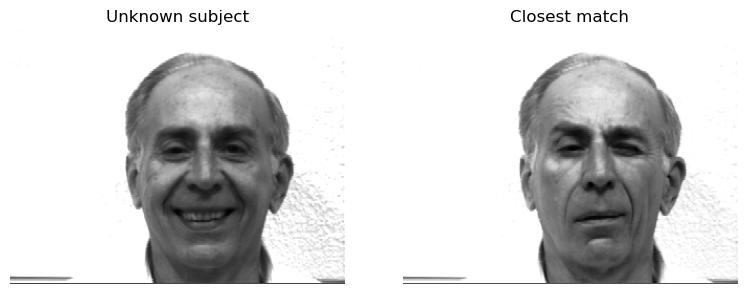

In [35]:

query('unknown/subject05.happy.gif', 'known')

CPU Execution time: 0.0 seconds

The closest match to the query unknown/subject04.rightlight.gif is subject02.sad.gif

and its image number in the database is 9


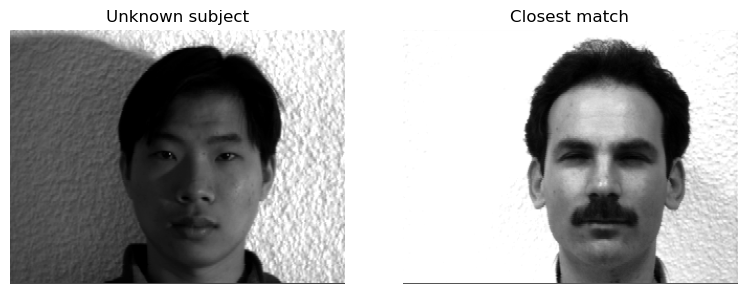

In [36]:

query('unknown/subject04.rightlight.gif', 'known')

CPU Execution time: 0.09375 seconds

The closest match to the query unknown/subject03.leftlight.gif is subject13.centerlight.gif

and its image number in the database is 73


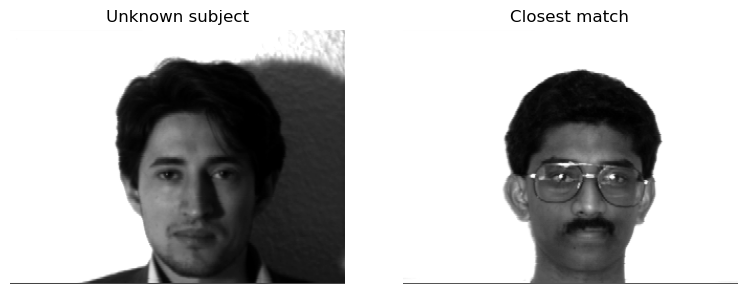

In [37]:

query('unknown/subject03.leftlight.gif', 'known')

CPU Execution time: 0.015625 seconds

The closest match to the query unknown/subject06.leftlight.gif is subject14.sad.gif

and its image number in the database is 81


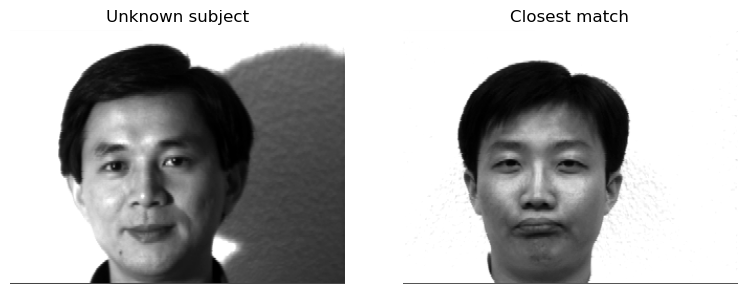

In [38]:
query('unknown/subject06.leftlight.gif', 'known')